1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

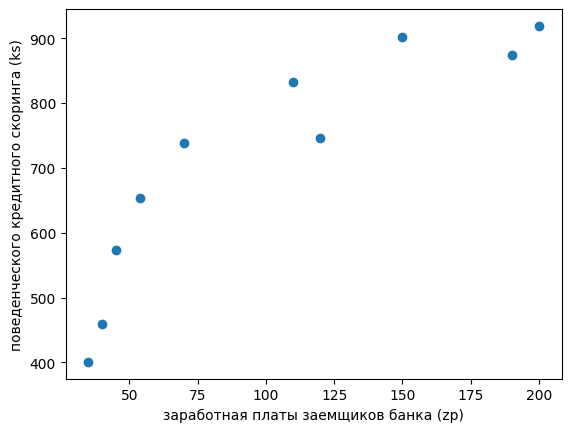

In [57]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp, ks)
plt.xlabel('заработная платы заемщиков банка (zp)')
plt.ylabel('поведенческого кредитного скоринга (ks)', rotation=90)
plt.show()


Находим с intercept


In [58]:
d = len(ks)
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / \
    (np.mean(zp ** 2) - np.mean(zp) ** 2)
b


2.620538882402765

In [59]:
a = np.mean(ks) - b * np.mean(zp)
a


444.1773573243596

In [60]:
chart = a + b * zp
chart


array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

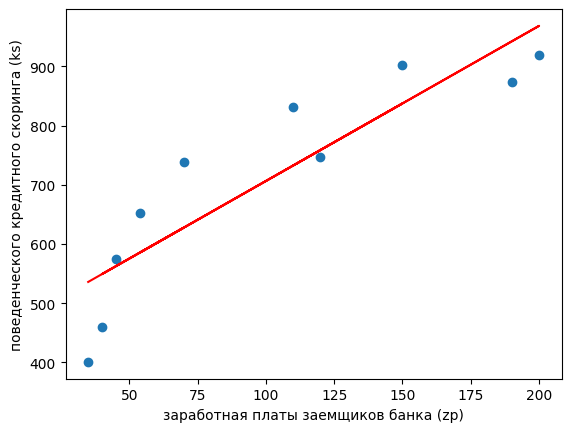

In [61]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, c='r')
plt.xlabel('заработная платы заемщиков банка (zp)')
plt.ylabel('поведенческого кредитного скоринга (ks)', rotation=90)
plt.show()


Cредняя квадратичная ошибка

In [62]:
mse_ = np.sum(((a + b * zp) - ks) ** 2 / d)
mse_


6470.414201176659

In [63]:
mse_ = ((ks - chart)**2).sum() / d
mse_


6470.414201176658

Находим без intercept

In [64]:
zp1 = zp.reshape(1, d)
ks1 = ks.reshape(1, d)


In [65]:
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
b1


5.889820420132689

In [66]:
chart1 = b1 * zp
chart1


array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

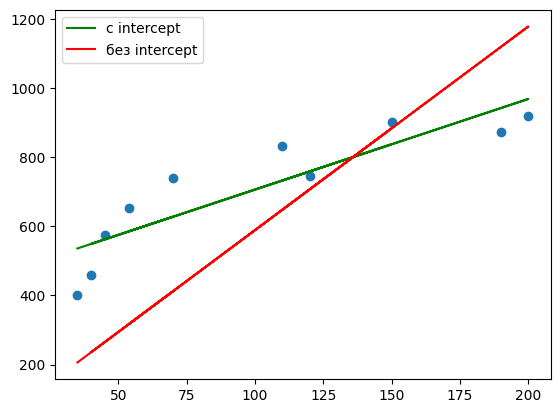

In [67]:
plt.scatter(zp, ks)
plt.plot(zp, chart, 'g', label='с intercept')
plt.plot(zp, chart1, 'r', label='без intercept')
plt.legend()
plt.show()


2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [68]:
def _mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)
_mse(2.62, zp, ks)

203812.48504

функция потерь

In [69]:
def _mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

параметр - скорость обучения 

In [70]:
alpha = 1e-06

In [71]:
b = 0.1
mse_min = _mse(b,zp,ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha * _mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min = _mse(b,zp,ks)
        i_min = i
        b_min = b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [72]:
b_min

5.889820285147628

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

функция потерь

In [73]:
def mse_ab(a,b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

Частная производная функции потерь по a

In [74]:
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

Частная производная функции потерь по b

In [75]:
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

Скорость обучения

In [76]:
alpha = 3e-5

In [77]:
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000
for i in range(iteration):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 50000 == 0:
        print(
            f' \033[34mИтерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(
            f' Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f' a = {a_min}\n b = {b_min}')


 Итерация #0, a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
 Итерация #50000, a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
 Итерация #100000, a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
 Итерация #150000, a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
 Итерация #200000, a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
 Итерация #250000, a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
 Итерация #300000, a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
 Итерация #350000, a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
 Итерация #400000, a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
 Итерация #450000, a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
 Итерация #500000, a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
 Итерация #550000, a=444.07456447602823, b=2.6212954716991606, mse=6470.4168814938